Grafy a otázky:

- úplně první film + první hraný celovečerní film
- nedochované filmy
- nástup zvuku
- sex v 50s
- proč se v 60s přestává točit barevně
- proč v 80s mizejí komunisté
- privatizace: omezení produkce & konec monopolu
- koprodukce
- čeho jsem si nevšiml, co vystihuje současný film?

In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))

In [2]:
df.shape

(4517, 132)

In [3]:
df.columns.to_list()

['Film',
 'Země původu',
 'Copyright',
 'Rok výroby',
 'Premiéra',
 'Minutáž',
 'Režie',
 'Kategorie',
 'Žánr',
 'Typologie',
 'Originální název',
 'Český název',
 'Anglický název',
 'Souběžný název',
 'Pracovní název',
 'Hrají',
 'Postavy',
 'Pomocná režie',
 'Asistent režie',
 'Původní filmový námět',
 'Scénář',
 'Dramaturg',
 'Kamera',
 'Asistent kamery',
 'Architekt',
 'Návrhy kostýmů',
 'Masky',
 'Střih',
 'Zvuk',
 'Producent',
 'Vedoucí výroby',
 'Zástupce vedoucího výroby',
 'Odborný poradce',
 'Hudba',
 'Choreografie',
 'Lokace',
 'Distribuční slogan',
 'Výrobce',
 'S podporou',
 'Nositelé copyrightu',
 'Distribuce',
 'Délka',
 'Distribuční nosič',
 'Poměr stran',
 'Barva',
 'Zvukový',
 'Zvukový systém/formát',
 'Verze',
 'Mluveno',
 'Podtitulky',
 'Úvodní/závěrečné titulky',
 'Anotace',
 'Obsah',
 'Technický scénář',
 'Výtvarník',
 'Animace',
 'Triky',
 'Postprodukce',
 'Návrhy titulků',
 'Pedagogické vedení',
 'Použitá hudba',
 'Studentský film',
 'Původní metráž',
 'Mezititu

<AxesSubplot:xlabel='Copyright'>

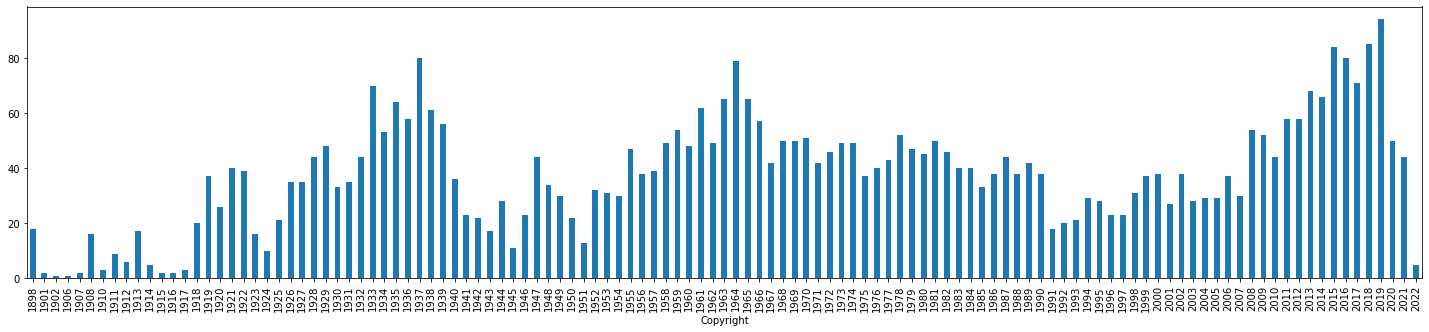

In [4]:
df.groupby("Copyright")["Film"].nunique().plot.bar(figsize=(25,5))

In [5]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")
hcf = hcf[hcf["Typologie"] == "hraný"]

In [6]:
hcf.shape

(2524, 132)

<AxesSubplot:xlabel='Copyright'>

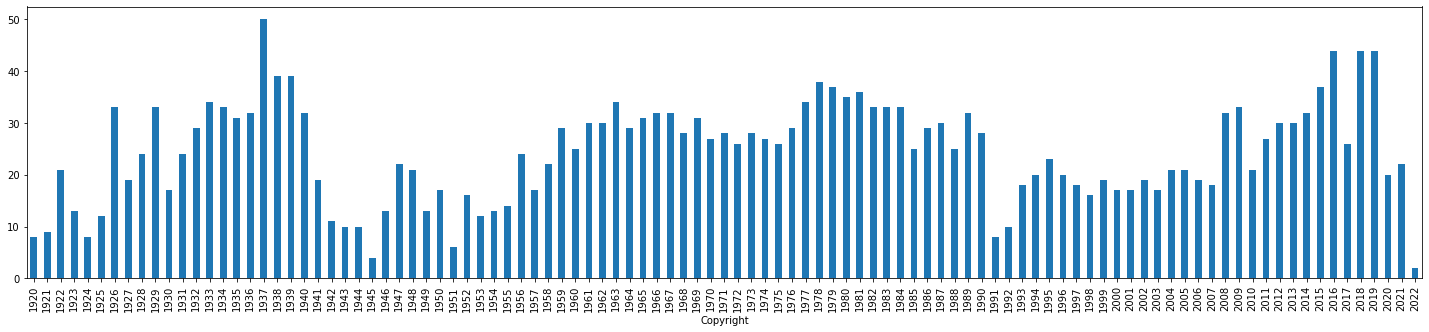

In [7]:
hcf.groupby("Copyright")["Film"].nunique().plot.bar(figsize=(25,5))

In [8]:
hcf.groupby("Copyright")["Film"].nunique().nsmallest(20)

Copyright
2022     2
1945     4
1951     6
1920     8
1924     8
1991     8
1921     9
1943    10
1944    10
1992    10
1942    11
1925    12
1953    12
1923    13
1946    13
1949    13
1954    13
1955    14
1952    16
1998    16
Name: Film, dtype: int64

In [9]:
hcf["Barva"].sample(10)

3870      barevný
2935      barevný
1403      barevný
1293    černobílý
4141      barevný
2400      barevný
3598      barevný
815     černobílý
1586    černobílý
3335      barevný
Name: Barva, dtype: object

<AxesSubplot:xlabel='Copyright'>

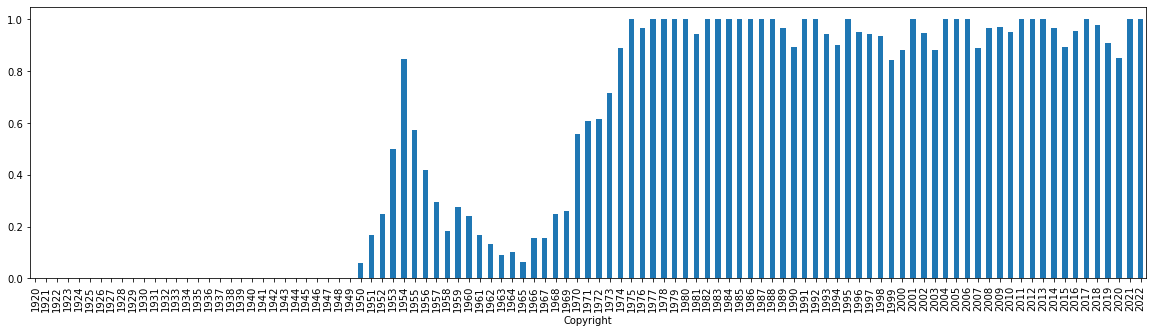

In [10]:
pd.Series(hcf[hcf["Barva"] == "barevný"].groupby("Copyright")["Film"].nunique() / hcf.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

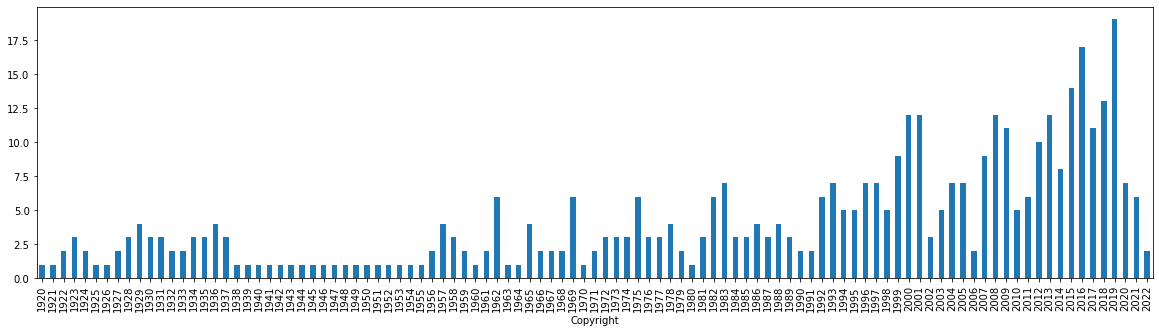

In [11]:
hcf.explode("Země původu").groupby("Copyright")["Země původu"].nunique().plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

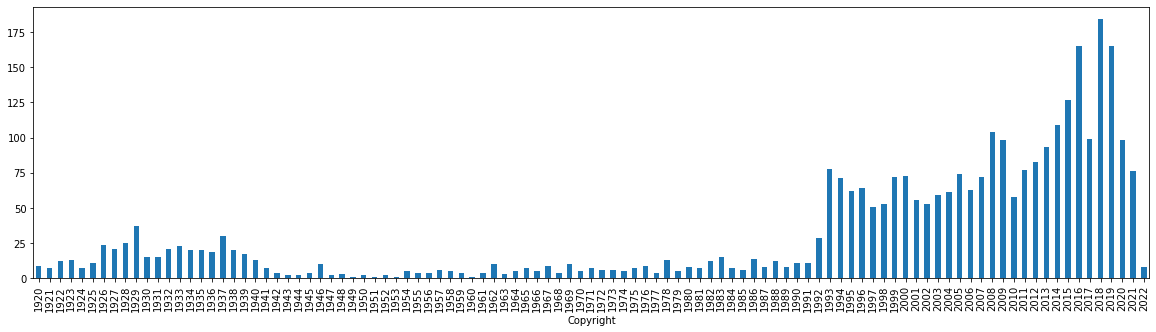

In [12]:
hcf.explode("Výrobce").groupby("Copyright")["Výrobce"].nunique().plot.bar(figsize=(20,5))

## Nedochované filmy

In [13]:
df["Stav filmu"].drop_duplicates()

0                          None
4                   nedochovaný
46     nedokončený, nedochovaný
165                 nedokončený
Name: Stav filmu, dtype: object

<AxesSubplot:xlabel='Copyright'>

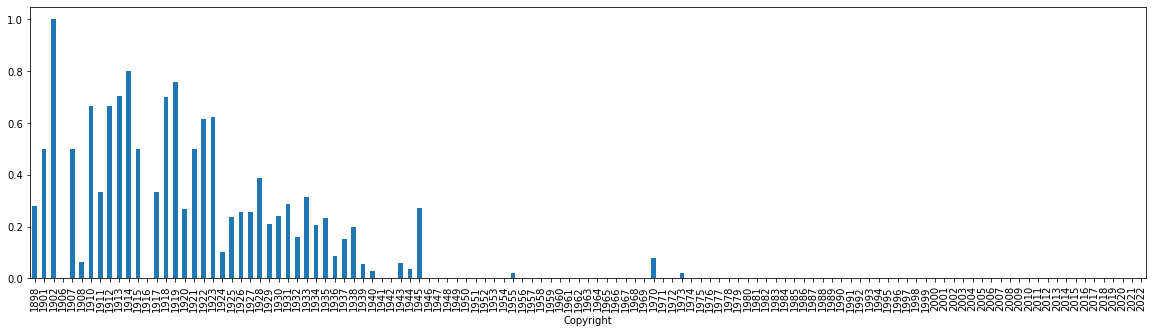

In [14]:
(df[df["Stav filmu"].str.lower().str.contains("nedocho",na=False)].groupby("Copyright")["Film"].nunique() / df.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

In [15]:
nejobsazovanejsi_herci = df.explode("Hrají").groupby("Hrají")["Film"].nunique().nlargest(50).to_list()

In [16]:
nedochovane = df[df["Stav filmu"].str.lower().str.contains("nedocho",na=False)].explode("Hrají")

In [17]:
nedochovane.groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Theodor Pištěk (37366)             33
Jan W. Speerger (55928)            27
Josef Šváb-Malostranský (55291)    22
Karel Lamač (37847)                21
Suzanne Marwille (127373)          17
Karel Schleichert (83230)          15
Marie Oliaková (124867)            14
Alois Sedláček (126991)            13
Josef Rovenský (37766)             13
Luigi Hofman (125431)              13
Name: Film, dtype: int64

In [18]:
nedochovane[nedochovane["Hrají"] == "Vlasta Burian (11992)"]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,Začátek výroby,Konec výroby
262,Tu ten kámen (395326),Československo,1923,1923,premiéra 7. 9. 1923 /nepřístupný mládeži/ (kin...,64.0,Karel Anton (37987),film,komedie,"[hraný, distribuční]",Tu ten kámen,Tu ten kámen,Tutankhamen,Kterak láskou možno v mžiku vzplanout třeba k ...,None,Vlasta Burian (11992),"[Fridolín, egyptolog Rapapides Bulva, starosta...",None,None,Karel Anton (37987),Karel Anton (37987),None,Otto Heller (127281),None,"[Bohuslav Šula (127389), František Poneš (1279...",None,None,None,None,None,None,None,None,None,None,[],Nejrozpustilejší česká veselohra. V hlavních ú...,Anton,None,Národní filmový archiv,Julius Schmitt,dlouhometrážní,35mm,1.33,černobílý,němý,None,česká,bez dialogů,bez titulků,české,None,Hrdinou příběhu je mladý sličný asistent slavn...,None,None,None,None,None,None,None,None,None,1800.0,české,None,První filmová role Vlasty Buriana. Filmové mat...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Jaroslav Balzar (124087),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,AB Vinohrady,None,None,None,None,None,None,None,None,None,nedochovaný,"How Love Can Flame in an Instant, Even for the...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1923,1923


In [19]:
nedochovane.groupby("Film")["Copyright"].max().nlargest(10)

Film
Pytagorejci (396963)             1973
A v tom zámku... (400451)        1970
Anně K. je zima (400452)         1970
Hippokratova přísaha (400450)    1970
Návštěvy (400449)                1970
Vzorný fízl (401944)             1955
Jenom krok (396005)              1945
Pošťácká pohádka (398617)        1945
Z růže kvítek (396004)           1945
Předtucha (395984)               1944
Name: Copyright, dtype: int64

In [20]:
nedochovane[nedochovane["Délka"] == "dlouhometrážní"].groupby("Film")["Copyright"].max().nlargest(10)

Film
Jenom krok (396005)                         1945
Z růže kvítek (396004)                      1945
Předtucha (395984)                          1944
Královna stříbrných hor (395855)            1939
Cikánská láska (395810)                     1938
Panenka [německá verze] (395803)            1938
Boží mlýny [německá verze] (395806)         1937
Lidé pod horami [německá verze] (395804)    1937
Ze všech jediná [německá verze] (395808)    1937
Pan otec Karafiát (395673)                  1935
Name: Copyright, dtype: int64

## Nástup zvuku

<AxesSubplot:xlabel='Copyright'>

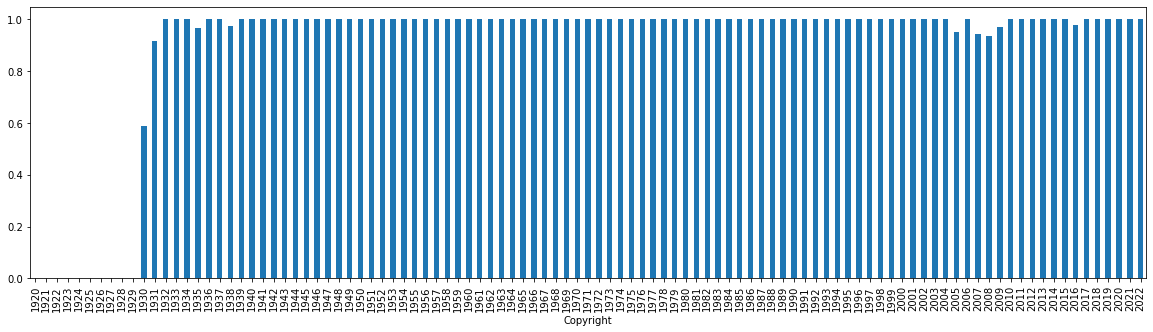

In [21]:
pd.Series(hcf[hcf["Zvukový"] == "zvukový"].groupby("Copyright")["Film"].nunique() / hcf.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

## Obsahy

In [22]:
hcf["Délka obsahu"] = hcf["Obsah"].apply(lambda x: len(x) if x else 0)

<AxesSubplot:xlabel='Copyright'>

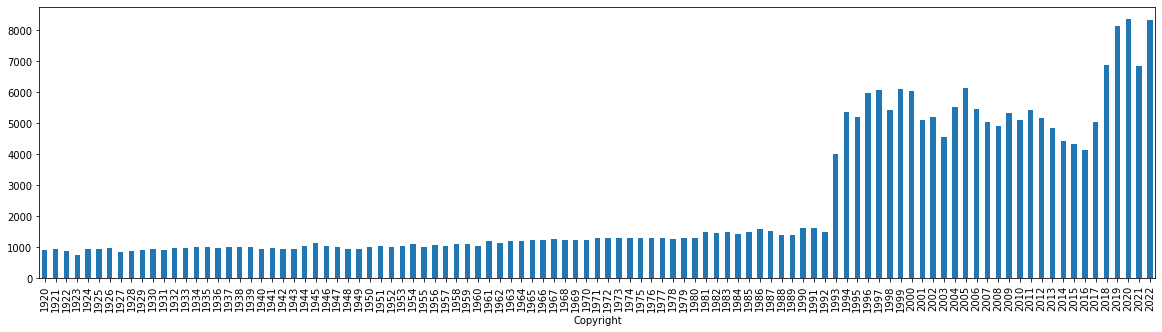

In [23]:
hcf.groupby("Copyright")["Délka obsahu"].median().plot.bar(figsize=(20,5))

In [24]:
hcf[hcf["Copyright"] <= 1992]["Délka obsahu"].mean()

1236.603227601558

In [25]:
def zkrat_obsah(obsah):
    if not obsah:
        pass
    elif len(obsah) < 1200:
        pass
    else:
        zacatek = obsah[0:400]
        konec = obsah[-400:]
        prostredek = len(obsah)
        prostredek = obsah[prostredek-200:prostredek+200]
        obsah = f"{zacatek} {prostredek} {konec}"
    return(obsah)

In [26]:
hcf["Obsah2k"] = hcf["Obsah"].apply(lambda x: zkrat_obsah(x))

In [27]:
hcf["Obsah2k délka"] = hcf["Obsah2k"].apply(lambda x: len(x) if x else 0)

<AxesSubplot:xlabel='Copyright'>

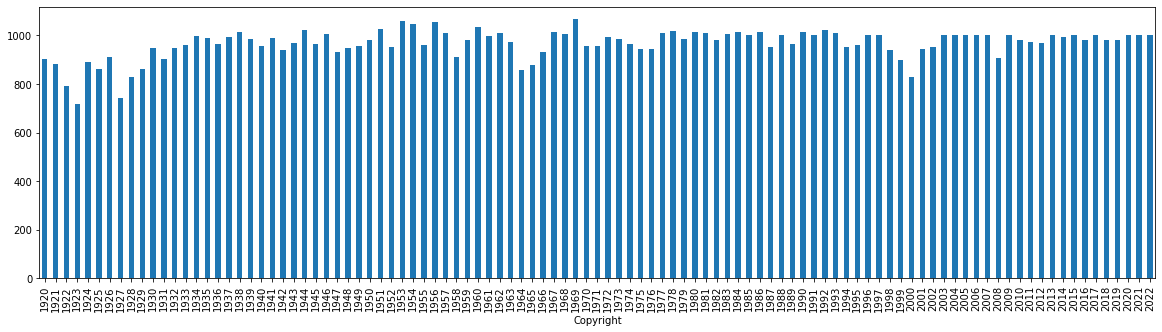

In [28]:
hcf.groupby("Copyright")["Obsah2k délka"].mean().plot.bar(figsize=(20,5))

In [29]:
def jak_casto (slovo):
    df_pracovni = hcf[["Copyright","Film","Obsah2k","Minutáž"]]
    cetnost = df_pracovni[df_pracovni["Obsah2k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()
    cetnost.plot.bar(figsize=(20,5))
    return(cetnost)

In [30]:
obsahy = hcf["Obsah"].drop_duplicates().to_list()
slova = [s for o in obsahy if o for s in o.replace(',', '').replace('.', '').split(' ')]

In [31]:
from collections import Counter
count = Counter(slova)
most_common_50 = count.most_common(50)
most_common_50

[('se', 35896),
 ('a', 29636),
 ('–', 20276),
 ('na', 18996),
 ('s', 15105),
 ('v', 13793),
 ('že', 12946),
 ('je', 11021),
 ('do', 9862),
 ('si', 6847),
 ('o', 6352),
 ('z', 6305),
 ('ho', 5333),
 ('mu', 5030),
 ('za', 4911),
 ('ale', 4847),
 ('jeho', 4239),
 ('i', 4175),
 ('který', 4057),
 ('k', 4055),
 ('aby', 3739),
 ('ji', 3594),
 ('však', 3462),
 ('po', 3283),
 ('ve', 3182),
 ('jí', 3115),
 ('má', 3056),
 ('to', 2990),
 ('u', 2905),
 ('V', 2651),
 ('před', 2506),
 ('pro', 2283),
 ('jako', 2280),
 ('Na', 2188),
 ('která', 2152),
 ('od', 2128),
 ('chce', 2065),
 ('pak', 1947),
 ('ní', 1831),
 ('kde', 1817),
 ('když', 1766),
 ('své', 1741),
 ('při', 1705),
 ('jak', 1653),
 ('její', 1649),
 ('jsou', 1600),
 ('jen', 1547),
 ('už', 1503),
 ('ze', 1470),
 ('Po', 1436)]

Nejdřív zkusíme "když" – zjistíme tak, jestli někde něco nechybí.

Copyright
1920    0.250000
1921    0.666667
1922    0.476190
1923    0.307692
1924    0.375000
          ...   
2018    0.272727
2019    0.431818
2020    0.150000
2021    0.272727
2022         NaN
Name: Film, Length: 103, dtype: float64

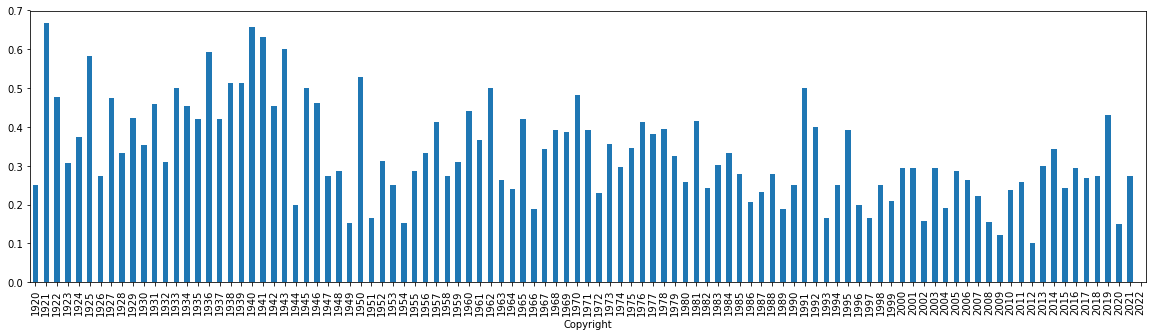

In [32]:
jak_casto("když")

Hurá, nechybí!

C:\Users\micha\AppData\Local\Temp\ipykernel_2572\1584601862.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah2k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920    0.125000
1921    0.222222
1922    0.095238
1923    0.384615
1924    0.250000
          ...   
2018    0.068182
2019    0.068182
2020    0.100000
2021         NaN
2022         NaN
Name: Film, Length: 103, dtype: float64

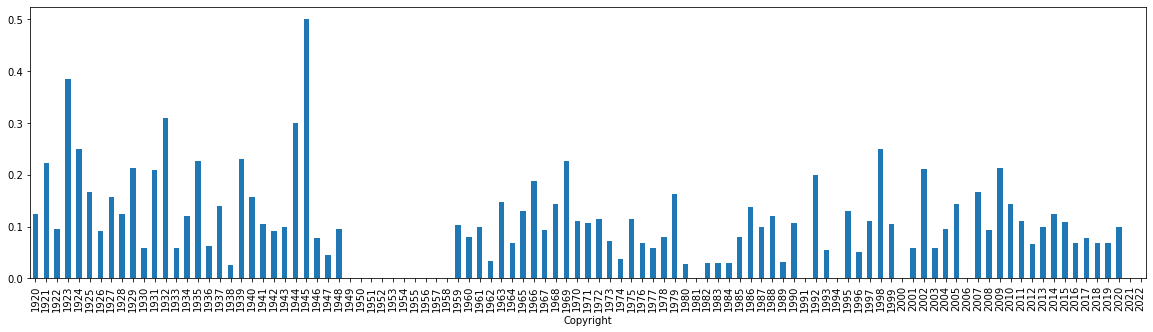

In [33]:
jak_casto("(milenk|milence|milenec|poměr[^\w]|nemanželsk)")

C:\Users\micha\AppData\Local\Temp\ipykernel_2572\1584601862.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah2k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920         NaN
1921         NaN
1922         NaN
1923         NaN
1924         NaN
          ...   
2018    0.022727
2019         NaN
2020         NaN
2021         NaN
2022         NaN
Name: Film, Length: 103, dtype: float64

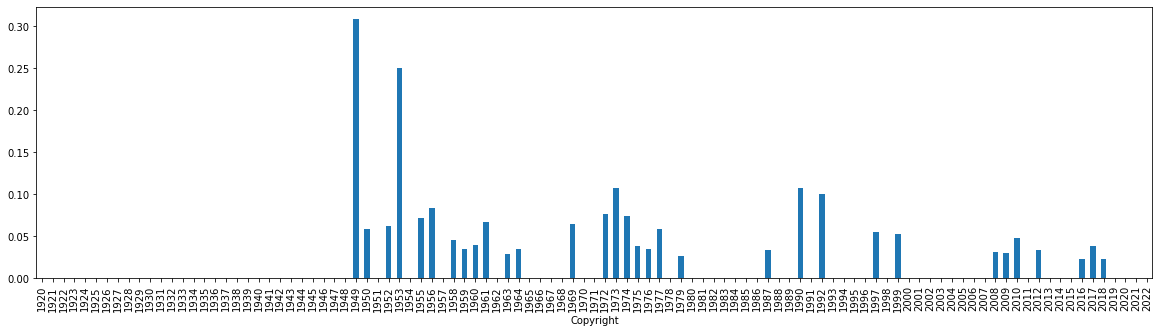

In [34]:
jak_casto("(komunis|KSČ)")